In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
objects_table_blue = Table.read('NGC5053_blue_stars.txt', format='ascii')
objects_table_red = Table.read('NGC5053_red_stars.txt', format='ascii')

## Matching objects using coordinates

In [3]:
objects_in_both = Table(names=['x_blue', 'x_red',
                               'y_blue', 'y_red', 
                               'flux_blue', 'flux_red'])

In [4]:
max_distance = 1 # the measured centers of the stars must be less than 1 pixel apart

# this might take a bit of time!
for blue_row in objects_table_blue:
    x_blue, y_blue = blue_row['x'], blue_row['y']
    for red_row in objects_table_red:
        x_red, y_red = red_row['x'], red_row['y']
        distance = ((x_blue - x_red)**2 + (y_blue - y_red)**2)**0.5
        if distance < max_distance:
            flux_blue = blue_row['flux']
            flux_red = red_row['flux']
            objects_in_both.add_row([x_blue, x_red, y_blue, y_red, flux_blue, flux_red])
            
objects_in_both

x_blue,x_red,y_blue,y_red,flux_blue,flux_red
float64,float64,float64,float64,float64,float64
6808.33791716,6808.34874278,1521.24312225,1521.15116015,444.303285152,294.961690653
6384.34582281,6383.73582957,1540.00857509,1540.20568046,18930.3436217,14397.1314115
6979.01056235,6979.00990003,1555.01159634,1555.01216177,325.00026477,222.453067074
7128.33630143,7128.78333523,1682.63647689,1682.44891234,14962.2637205,7030.74593153
6385.09094687,6385.20346406,1760.25101238,1760.39052523,616.804177947,444.026310704
6262.53279474,6262.59444232,1827.23795918,1827.30811513,4634.99236175,3952.73665682
7164.00026655,7164.01532134,1830.94088817,1830.72000077,389.80488988,257.283821674
5923.73573413,5923.69434099,1912.87199229,1912.82479078,1229.01751265,968.742935573
6859.8767887,6859.45607946,1938.20118343,1938.28469066,17950.7484511,14993.4526209


## Converting flux to magnitudes

The system that most observational astronomers use to indicate brightness is called the [magnitude system](https://en.wikipedia.org/wiki/Magnitude_%29astronomy%29). Because nothing can ever be intuitive, the magnitude system runs backwards: a star with magnitude 1 is **brighter** than a star with magnitude 6. How much brighter? In addition to being backwards, magnitudes are *logarithmic*: a star with magnitude 1 is 100 times brighter than a star with magnitude 6, and a star with magnitude 6 is five times brighter than a star with magnitude 8. Makes sense, right?

So, what we've measured is *flux*: the amount of light per unit time that reaches us from a source. How do we turn it into magnitudes?

Mathematically, here's what this looks like. The apparent magnitude of a source, $m$, is related to the measured flux, $F$, as follows:

<center>$m = -2.5\log_{10} (F) - Z$</center>

where $Z$ is a "zeropoint" that's specific to an individual imaging system (that is, the combination of the telescope mirror, detector, and filter—these all affect the measured image fluxes in different ways).

In [5]:
zpt_blue = 26.418
zpt_red = 25.527

mag_blue = -2.5*np.log10(objects_in_both['flux_blue']) + zpt_blue
mag_red = -2.5*np.log10(objects_in_both['flux_red']) + zpt_red

In [9]:
objects_in_both['mag_blue'] = mag_blue
objects_in_both['mag_red'] = mag_red

objects_in_both

x_blue,x_red,y_blue,y_red,flux_blue,flux_red,mag_blue,mag_red
float64,float64,float64,float64,float64,float64,float64,float64
6808.33791716,6808.34874278,1521.24312225,1521.15116015,444.303285152,294.961690653,19.798801189,19.3525859653
6384.34582281,6383.73582957,1540.00857509,1540.20568046,18930.3436217,14397.1314115,15.7251037567,15.1313100781
6979.01056235,6979.00990003,1555.01159634,1555.01216177,325.00026477,222.453067074,20.138290713,19.6589040051
7128.33630143,7128.78333523,1682.63647689,1682.44891234,14962.2637205,7030.74593153,15.9805067369,15.9094964895
6385.09094687,6385.20346406,1760.25101238,1760.39052523,616.804177947,444.026310704,19.4426317331,18.9084782377
6262.53279474,6262.59444232,1827.23795918,1827.30811513,4634.99236175,3952.73665682,17.252877443,16.5347552967
7164.00026655,7164.01532134,1830.94088817,1830.72000077,389.80488988,257.283821674,19.940881793,19.5009688048
5923.73573413,5923.69434099,1912.87199229,1912.82479078,1229.01751265,968.742935573,18.6941048217,18.0614786288
6859.8767887,6859.45607946,1938.20118343,1938.28469066,17950.7484511,14993.4526209,15.7827935973,15.0872458709


## How did we do?

We have a reference catalog at hand, NGC5053_reference_catalog.txt, with high-quality photometry that we can compare our results to.

In [14]:
objects_ref = Table.read('NGC5053_reference_catalog.txt', format='ascii')
objects_ref

x,y,mag_blue,mag_red,color
float64,float64,float64,float64,float64
6384.182,1541.384,16.375,15.803,0.572
7129.075,1683.002,16.744,16.608,0.136
5937.366,1685.6,14.551,13.692,0.859
6386.084,1761.278,19.482,19.014,0.468
6263.428,1828.389,17.705,17.057,0.648
7165.071,1831.855,20.07,19.72,0.35
5924.667,1914.058,18.651,18.044,0.607
6860.05,1939.498,16.114,15.383,0.731
7136.75,1980.564,18.538,17.931,0.607


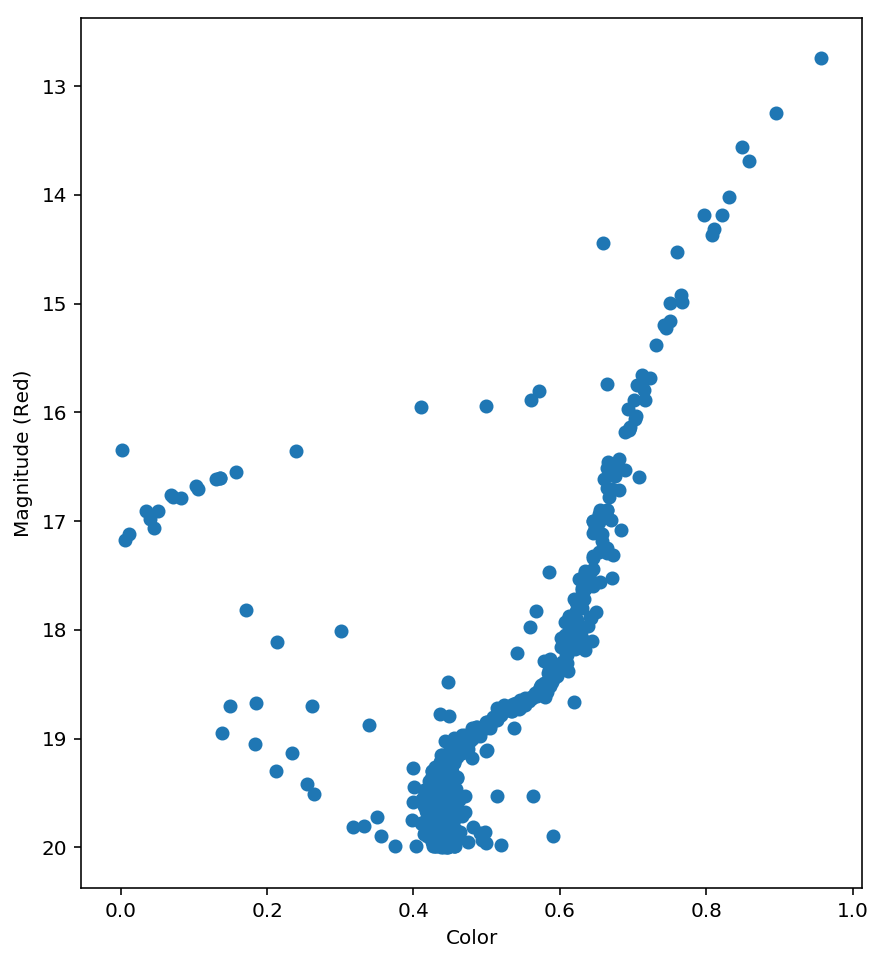

In [21]:
fig, ax = plt.subplots(1, figsize=(7,8))
ax.scatter(objects_ref['mag_blue']-objects_ref['mag_red'], objects_ref['mag_red'])
ax.set_xlabel('Color')
ax.set_ylabel('Magnitude (Red)')
ax.invert_yaxis()